# 🔬 深入理解：LLM的文本处理与知识检索原理

## 🤔 您的深度疑问

您提出了几个非常关键的底层问题：

1. **为什么LLM训练不需要向量转化？AI不是不能识别文字吗？**
2. **向量库检索和从参数里检索有什么区别？**
3. **什么叫从参数中提取知识？**
4. **是不是从参数里检索更快？**
5. **向量数据库是不是越大检索越慢？**

这些问题触及了AI的核心原理！让我详细解答。

---


In [1]:
# 导入库
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch, Rectangle
import numpy as np

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

print("✅ 环境配置完成！")


✅ 环境配置完成！


## 💡 问题1：LLM训练为什么不需要向量转化？AI不能识别文字吗？

### 关键误解澄清

**您说得对：AI确实不能直接识别文字！**

但是：
- ✅ LLM训练**也需要**把文字转成数字
- ✅ 只是转换方式**不同于**向量数据库
- ✅ LLM用的是**Token化**，不是**Embedding向量**

### 🔑 两种不同的转换方式

#### 方式1：Token化（LLM训练用）

```python
# LLM训练时的转换
文本 = "人工智能"

# 步骤1：分词（Tokenization）
tokens = ["人工", "智能"]

# 步骤2：转成ID（数字）
token_ids = [1234, 5678]  # 每个词对应一个整数ID

# 步骤3：转成One-Hot或Embedding
# 这是在模型内部完成的，不是提前存储的
input_vector = [0, 0, ..., 1, ..., 0]  # 第1234位是1
```

**特点：**
- 用于训练时的输入
- 每个token是一个ID
- 不需要提前计算相似度
- 是"临时"的转换

#### 方式2：Embedding向量（RAG用）

```python
# RAG系统的转换
文本 = "人工智能"

# 直接转成语义向量
embedding_vector = [0.23, -0.45, 0.67, ..., 0.12]  # 768维

# 特点：
# 1. 包含语义信息
# 2. 相似文本的向量相似
# 3. 需要提前存储在向量库
```

**特点：**
- 用于检索相似文档
- 包含语义信息
- 需要提前计算并存储
- 是"持久"的存储

---


C:\Users\Administrator\AppData\Local\Temp\ipykernel_31724\206511755.py:124: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) SimHei.
  plt.tight_layout()
C:\Users\Administrator\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


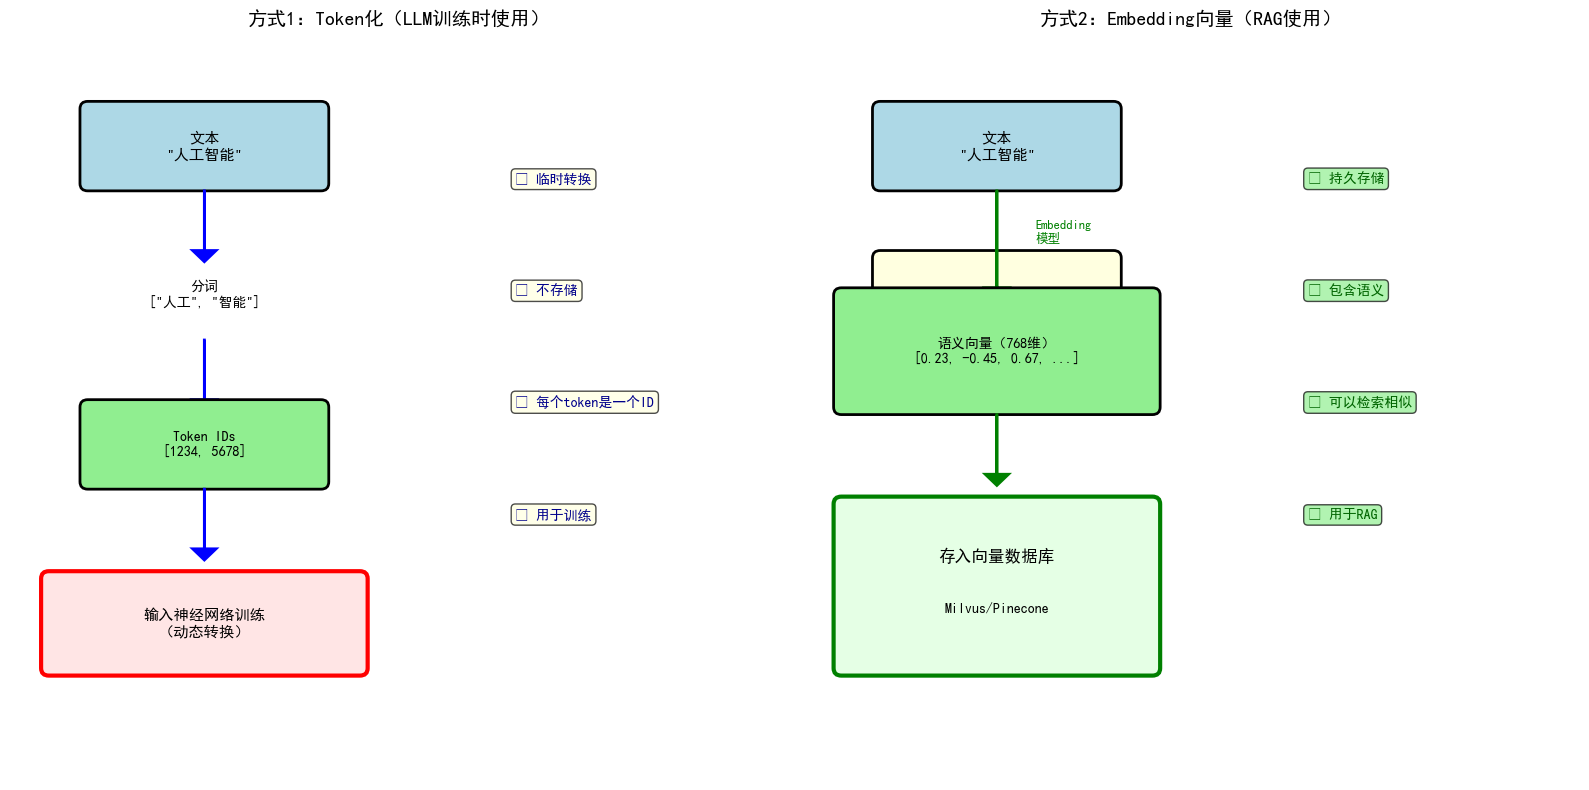

💡 关键区别：
  - Token化：临时转换，用于训练，不存储
  - Embedding：持久存储，包含语义，用于检索
  - 两者都把文字转成数字，但目的和方式不同！


In [2]:
# 可视化两种转换方式的区别
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# ===== 左图：Token化（LLM训练） =====
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)
ax1.axis('off')
ax1.set_title('方式1：Token化（LLM训练时使用）', fontsize=14, fontweight='bold')

# 文本
box1 = FancyBboxPatch((1, 8), 3, 1,
                     boxstyle="round,pad=0.1", 
                     edgecolor='black', facecolor='lightblue',
                     linewidth=2)
ax1.add_patch(box1)
ax1.text(2.5, 8.5, '文本\n"人工智能"', ha='center', va='center',
        fontsize=11, fontweight='bold')

# 箭头
ax1.arrow(2.5, 7.9, 0, -0.8, head_width=0.3, head_length=0.15,
         fc='blue', ec='blue', linewidth=2)

# 分词
box2 = FancyBboxPatch((1, 6), 3, 1,
                     boxstyle="round,pad=0.1", 
                     edgecolor='black', facecolor='lightyellow',
                     linewidth=2)
ax2.add_patch(box2)
ax1.text(2.5, 6.5, '分词\n["人工", "智能"]', ha='center', va='center',
        fontsize=10, fontweight='bold')

# 箭头
ax1.arrow(2.5, 5.9, 0, -0.8, head_width=0.3, head_length=0.15,
         fc='blue', ec='blue', linewidth=2)

# Token IDs
box3 = FancyBboxPatch((1, 4), 3, 1,
                     boxstyle="round,pad=0.1", 
                     edgecolor='black', facecolor='lightgreen',
                     linewidth=2)
ax1.add_patch(box3)
ax1.text(2.5, 4.5, 'Token IDs\n[1234, 5678]', ha='center', va='center',
        fontsize=10, fontweight='bold')

# 箭头
ax1.arrow(2.5, 3.9, 0, -0.8, head_width=0.3, head_length=0.15,
         fc='blue', ec='blue', linewidth=2)

# 训练
box4 = FancyBboxPatch((0.5, 1.5), 4, 1.2,
                     boxstyle="round,pad=0.1", 
                     edgecolor='red', facecolor='#FFE5E5',
                     linewidth=3)
ax1.add_patch(box4)
ax1.text(2.5, 2.1, '输入神经网络训练\n（动态转换）', ha='center', va='center',
        fontsize=11, fontweight='bold')

# 特点标注
features1 = [
    '✓ 临时转换',
    '✓ 不存储',
    '✓ 每个token是一个ID',
    '✓ 用于训练'
]
for i, feat in enumerate(features1):
    ax1.text(6.5, 8-i*1.5, feat, fontsize=10, color='darkblue',
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))

# ===== 右图：Embedding向量（RAG） =====
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 10)
ax2.axis('off')
ax2.set_title('方式2：Embedding向量（RAG使用）', fontsize=14, fontweight='bold')

# 文本
box1 = FancyBboxPatch((1, 8), 3, 1,
                     boxstyle="round,pad=0.1", 
                     edgecolor='black', facecolor='lightblue',
                     linewidth=2)
ax2.add_patch(box1)
ax2.text(2.5, 8.5, '文本\n"人工智能"', ha='center', va='center',
        fontsize=11, fontweight='bold')

# 箭头
ax2.arrow(2.5, 7.9, 0, -1.3, head_width=0.3, head_length=0.15,
         fc='green', ec='green', linewidth=2)
ax2.text(3, 7.2, 'Embedding\n模型', ha='left', fontsize=9, color='green')

# 语义向量
box2 = FancyBboxPatch((0.5, 5), 4, 1.5,
                     boxstyle="round,pad=0.1", 
                     edgecolor='black', facecolor='lightgreen',
                     linewidth=2)
ax2.add_patch(box2)
ax2.text(2.5, 5.75, '语义向量（768维）\n[0.23, -0.45, 0.67, ...]', 
        ha='center', va='center', fontsize=10, fontweight='bold')

# 箭头
ax2.arrow(2.5, 4.9, 0, -0.8, head_width=0.3, head_length=0.15,
         fc='green', ec='green', linewidth=2)

# 向量数据库
box3 = FancyBboxPatch((0.5, 1.5), 4, 2.2,
                     boxstyle="round,pad=0.1", 
                     edgecolor='green', facecolor='#E5FFE5',
                     linewidth=3)
ax2.add_patch(box3)
ax2.text(2.5, 3, '存入向量数据库', ha='center', va='center',
        fontsize=12, fontweight='bold')
ax2.text(2.5, 2.3, 'Milvus/Pinecone', ha='center', va='center',
        fontsize=10, style='italic')

# 特点标注
features2 = [
    '✓ 持久存储',
    '✓ 包含语义',
    '✓ 可以检索相似',
    '✓ 用于RAG'
]
for i, feat in enumerate(features2):
    ax2.text(6.5, 8-i*1.5, feat, fontsize=10, color='darkgreen',
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

plt.tight_layout()
plt.show()

print("💡 关键区别：")
print("  - Token化：临时转换，用于训练，不存储")
print("  - Embedding：持久存储，包含语义，用于检索")
print("  - 两者都把文字转成数字，但目的和方式不同！")


## 💡 问题2&3：什么叫"从参数中提取知识"？

### 🧠 核心理解：参数就是知识

**LLM的参数（权重）就是经过训练后"压缩"的知识！**

### 📊 类比：人脑的神经连接

```
人类学习：
  看书 → 大脑神经元连接改变 → 知识存在神经连接中
  回忆时：激活这些神经连接 → 想起知识

LLM学习：
  训练数据 → 模型参数调整 → 知识存在参数中
  推理时：通过参数计算 → 生成答案
```

### 🔬 详细解释

#### 训练阶段：知识写入参数

```python
# 假设一个超简单的"模型"（实际有1750亿个参数）
参数 = {
    'w1': 0.5,  # 初始随机值
    'w2': 0.3,
    'w3': 0.8,
    # ... 1750亿个参数
}

# 训练过程
for 文本 in 训练数据:
    预测 = 用参数计算(文本)
    误差 = 预测 - 真实答案
    
    # 关键：调整参数（梯度下降）
    参数['w1'] = 参数['w1'] - 学习率 × 梯度
    参数['w2'] = 参数['w2'] - 学习率 × 梯度
    # ...
    
# 训练完成后：
# 知识已经"编码"在这1750亿个参数中了！
```

#### 推理阶段：从参数提取知识

```python
# 用户提问："人工智能是什么？"

# 1. 把问题转成token IDs
input_ids = tokenize("人工智能是什么？")  # [123, 456, 789, ...]

# 2. 通过神经网络计算（使用训练好的参数）
def generate_answer(input_ids, 参数):
    # 第1层计算
    h1 = 参数['w1'] * input_ids + 参数['b1']
    
    # 第2层计算
    h2 = 参数['w2'] * h1 + 参数['b2']
    
    # ... 很多层
    
    # 最后输出
    output = 参数['w_final'] * h_last + 参数['b_final']
    
    return output

# 3. 输出结果
答案 = generate_answer(input_ids, 参数)
# "人工智能是计算机科学的一个分支..."

# 关键：这个答案是通过参数"计算"出来的
# 不是从数据库"检索"出来的！
```

### 🎯 "从参数提取知识"的本质

```
不是检索，是计算！

类比：
  错误理解：LLM像个数据库，查询知识
  ↓
  正确理解：LLM像个函数，计算答案
  
  f(x) = w1*x + w2*x² + ... （w1, w2是参数）
  
  输入问题 → 通过参数计算 → 输出答案
```

---


C:\Users\Administrator\AppData\Local\Temp\ipykernel_31724\1325082835.py:89: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) SimHei.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_31724\1325082835.py:89: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) SimHei.
  plt.tight_layout()
C:\Users\Administrator\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


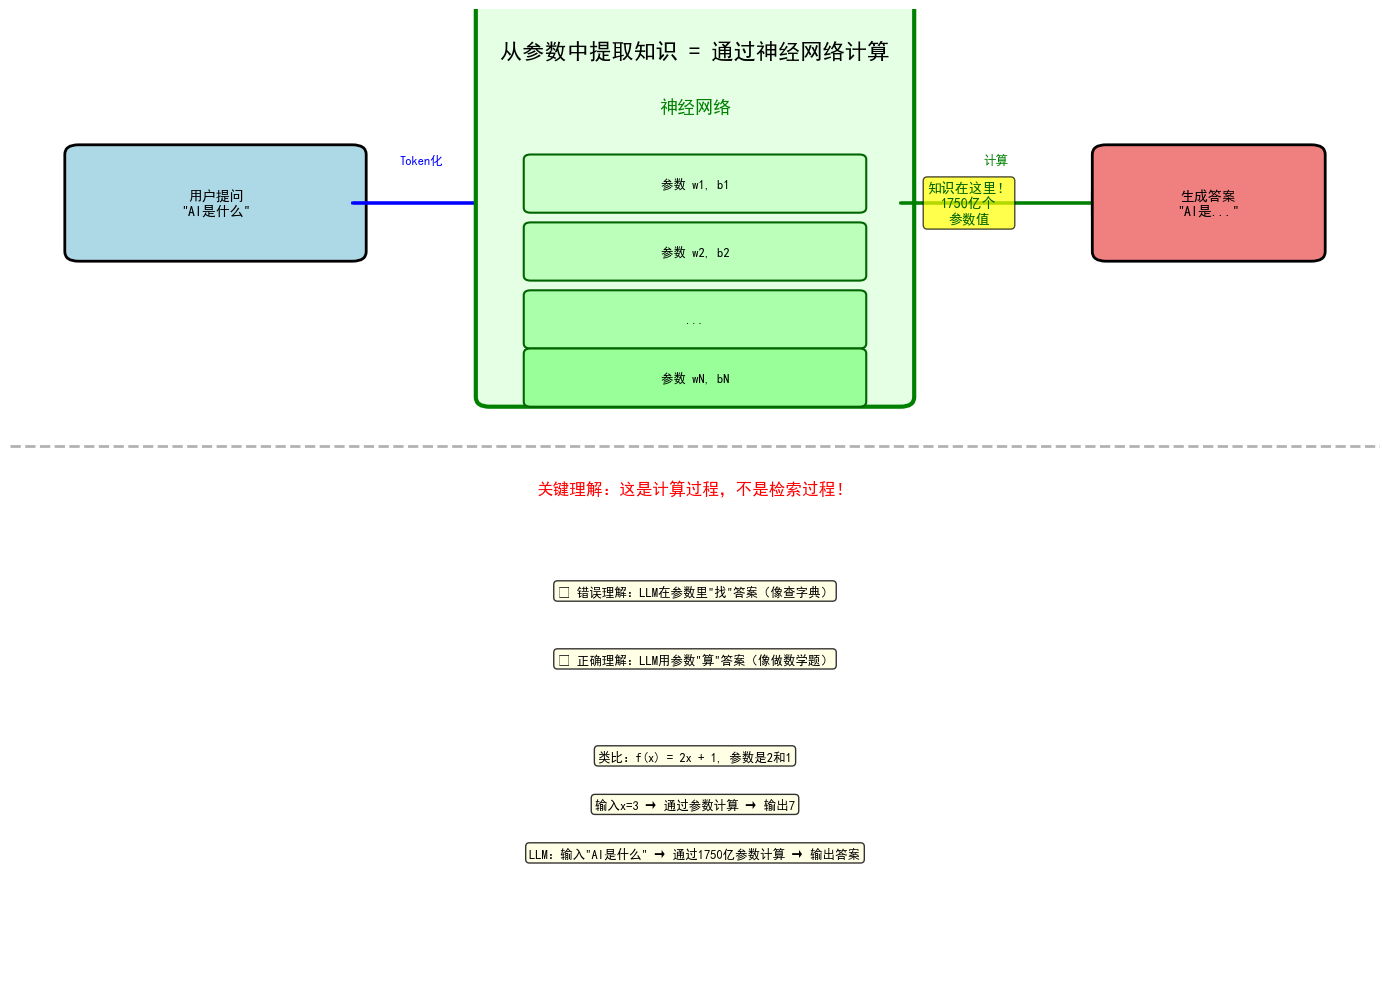

💡 核心理解：
  - '从参数提取知识' = 通过参数计算答案
  - 不是检索，是计算！
  - 参数就是经过训练后的'知识编码'
  - 1750亿个参数 = 1750亿个学习到的'规律'


In [3]:
# 可视化"从参数提取知识"
fig, ax = plt.subplots(figsize=(14, 10))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

ax.text(5, 9.5, '从参数中提取知识 = 通过神经网络计算', ha='center',
        fontsize=16, fontweight='bold')

# 输入
box1 = FancyBboxPatch((0.5, 7.5), 2, 1,
                     boxstyle="round,pad=0.1", 
                     edgecolor='black', facecolor='lightblue',
                     linewidth=2)
ax.add_patch(box1)
ax.text(1.5, 8, '用户提问\n"AI是什么"', ha='center', va='center',
        fontsize=10, fontweight='bold')

# 箭头
ax.arrow(2.5, 8, 0.9, 0, head_width=0.2, head_length=0.15,
         fc='blue', ec='blue', linewidth=2)
ax.text(3, 8.4, 'Token化', ha='center', fontsize=9, color='blue')

# 神经网络（参数）
network_box = FancyBboxPatch((3.5, 6), 3, 4,
                            boxstyle="round,pad=0.1", 
                            edgecolor='green', facecolor='#E5FFE5',
                            linewidth=3)
ax.add_patch(network_box)
ax.text(5, 9, '神经网络', ha='center', va='center',
        fontsize=13, fontweight='bold', color='green')

# 参数层
layers = [
    {'y': 8.2, 'text': '参数 w1, b1', 'color': '#CCFFCC'},
    {'y': 7.5, 'text': '参数 w2, b2', 'color': '#BBFFBB'},
    {'y': 6.8, 'text': '...', 'color': '#AAFFAA'},
    {'y': 6.2, 'text': '参数 wN, bN', 'color': '#99FF99'},
]

for layer in layers:
    layer_box = FancyBboxPatch((3.8, layer['y']-0.25), 2.4, 0.5,
                              boxstyle="round,pad=0.05", 
                              edgecolor='darkgreen', facecolor=layer['color'],
                              linewidth=1.5)
    ax.add_patch(layer_box)
    ax.text(5, layer['y'], layer['text'], ha='center', va='center',
            fontsize=9, fontweight='bold')

# 知识标注
ax.text(7, 8, '知识在这里！\n1750亿个\n参数值', ha='center', va='center',
        fontsize=10, color='darkgreen', fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# 箭头
ax.arrow(6.5, 8, 1.4, 0, head_width=0.2, head_length=0.15,
         fc='green', ec='green', linewidth=2)
ax.text(7.2, 8.4, '计算', ha='center', fontsize=9, color='green')

# 输出
output_box = FancyBboxPatch((8, 7.5), 1.5, 1,
                           boxstyle="round,pad=0.1", 
                           edgecolor='black', facecolor='lightcoral',
                           linewidth=2)
ax.add_patch(output_box)
ax.text(8.75, 8, '生成答案\n"AI是..."', ha='center', va='center',
        fontsize=10, fontweight='bold')

# 分割线
ax.plot([0, 10], [5.5, 5.5], 'k--', linewidth=2, alpha=0.3)

# 底部解释
ax.text(5, 5, '关键理解：这是计算过程，不是检索过程！', ha='center',
        fontsize=12, fontweight='bold', color='red')

# 详细解释
explanations = [
    {'y': 4, 'text': '❌ 错误理解：LLM在参数里"找"答案（像查字典）'},
    {'y': 3.3, 'text': '✅ 正确理解：LLM用参数"算"答案（像做数学题）'},
    {'y': 2.3, 'text': '类比：f(x) = 2x + 1, 参数是2和1'},
    {'y': 1.8, 'text': '输入x=3 → 通过参数计算 → 输出7'},
    {'y': 1.3, 'text': 'LLM：输入"AI是什么" → 通过1750亿参数计算 → 输出答案'},
]

for exp in explanations:
    ax.text(5, exp['y'], exp['text'], ha='center', va='center',
            fontsize=9, bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.show()

print("💡 核心理解：")
print("  - '从参数提取知识' = 通过参数计算答案")
print("  - 不是检索，是计算！")
print("  - 参数就是经过训练后的'知识编码'")
print("  - 1750亿个参数 = 1750亿个学习到的'规律'")


## 💡 问题4：向量库检索 vs 参数计算，哪个更快？

### 🚀 速度对比

**答案：要看具体情况，但各有优势！**

### 📊 详细对比

| 维度 | 从参数计算（普通LLM） | 向量库检索（RAG） |
|------|---------------------|------------------|
| **计算类型** | 神经网络前向传播 | 向量相似度搜索 |
| **计算量** | 1750亿次参数计算 | 取决于向量库大小 |
| **速度** | 较慢（几百ms到几秒） | 检索快（几十ms），但还要LLM生成 |
| **总时间** | 单次LLM调用 | 检索 + LLM生成（更慢） |
| **优势** | 知识融合好 | 可以引用具体文档 |

### 🎯 实际速度分析

#### 场景1：简单问答

```python
问题："什么是人工智能？"

普通LLM：
  ├─ 输入问题（1ms）
  ├─ 神经网络计算（500ms）
  └─ 输出答案（1ms）
  总计：~502ms
  
RAG系统：
  ├─ 输入问题（1ms）
  ├─ 向量化问题（10ms）
  ├─ 向量库检索（50ms）
  ├─ 获取相关文档（10ms）
  ├─ 文档+问题给LLM（1ms）
  ├─ LLM生成答案（500ms）
  └─ 输出答案（1ms）
  总计：~573ms

结论：普通LLM更快！
```

#### 场景2：需要准确引用

```python
问题："公司2024年Q1销售额是多少？"

普通LLM：
  - 可能胡说（幻觉）❌
  - 速度快但答案错误 = 没用
  
RAG系统：
  - 找到准确文档 ✅
  - 基于真实数据回答 ✅
  - 虽然慢一点，但答案准确！

结论：RAG更可靠！
```

### 💡 关键理解

**不能简单比速度，要看：**

1. **准确性要求**
   - 闲聊：普通LLM快
   - 专业问答：RAG准确

2. **知识时效性**
   - 通用知识：LLM够用
   - 最新信息：必须RAG

3. **可追溯性**
   - 不需要引用：LLM快
   - 需要引用来源：RAG

---


C:\Users\Administrator\AppData\Local\Temp\ipykernel_31724\2532016510.py:95: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) SimHei.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_31724\2532016510.py:95: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) SimHei.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_31724\2532016510.py:95: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) SimHei.
  plt.tight_layout()
C:\Users\Administrator\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


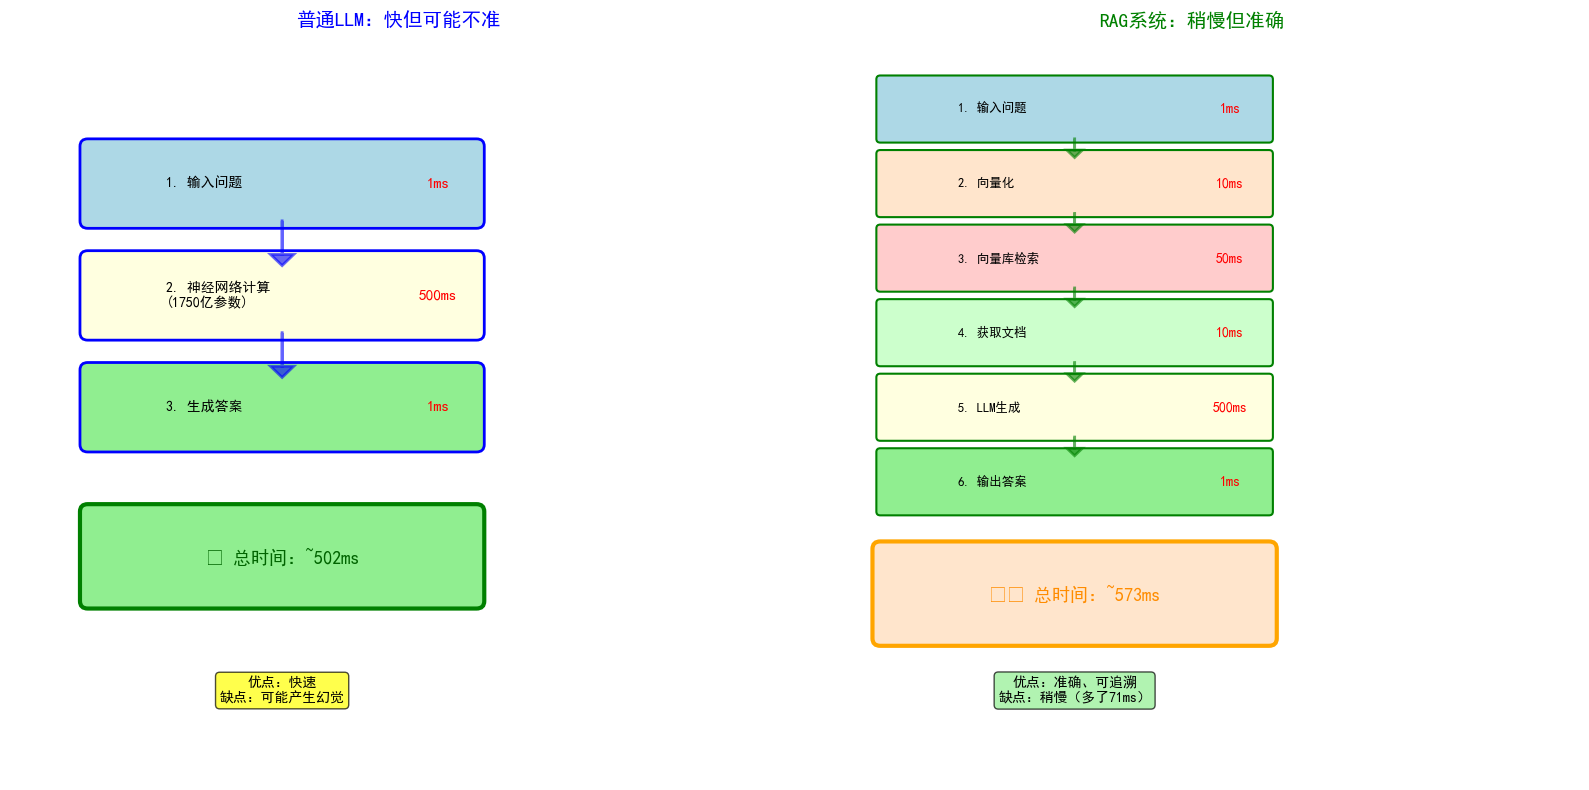

⏱️ 速度对比总结：
  - 普通LLM：502ms（快14%）
  - RAG系统：573ms（多了检索步骤）

💡 结论：
  - 单纯比速度：LLM快一点
  - 但RAG多换来的是准确性和可追溯性
  - 实际应用中，70ms的差异用户感知不强


In [4]:
# 可视化速度对比
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# ===== 左图：普通LLM =====
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)
ax1.axis('off')
ax1.set_title('普通LLM：快但可能不准', fontsize=14, fontweight='bold', color='blue')

steps1 = [
    {'y': 8, 'text': '1. 输入问题', 'time': '1ms', 'color': 'lightblue'},
    {'y': 6.5, 'text': '2. 神经网络计算\n(1750亿参数)', 'time': '500ms', 'color': 'lightyellow'},
    {'y': 5, 'text': '3. 生成答案', 'time': '1ms', 'color': 'lightgreen'},
]

total_y = 3
for step in steps1:
    box = FancyBboxPatch((1, step['y']-0.5), 5, 1,
                        boxstyle="round,pad=0.1", 
                        edgecolor='blue', facecolor=step['color'],
                        linewidth=2)
    ax1.add_patch(box)
    ax1.text(2, step['y'], step['text'], ha='left', va='center',
            fontsize=10, fontweight='bold')
    ax1.text(5.5, step['y'], step['time'], ha='center', va='center',
            fontsize=11, color='red', fontweight='bold')

# 连接箭头
for i in range(len(steps1)-1):
    y1 = steps1[i]['y'] - 0.5
    y2 = steps1[i+1]['y'] + 0.5
    ax1.arrow(3.5, y1, 0, y2-y1+0.05, head_width=0.3, head_length=0.15,
             fc='blue', ec='blue', linewidth=2, alpha=0.6)

# 总计
total_box = FancyBboxPatch((1, total_y-0.6), 5, 1.2,
                          boxstyle="round,pad=0.1", 
                          edgecolor='green', facecolor='lightgreen',
                          linewidth=3)
ax1.add_patch(total_box)
ax1.text(3.5, total_y, '✅ 总时间：~502ms', ha='center', va='center',
        fontsize=13, fontweight='bold', color='darkgreen')

# 优缺点
ax1.text(3.5, 1.2, '优点：快速\n缺点：可能产生幻觉', ha='center', va='center',
        fontsize=10, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# ===== 右图：RAG系统 =====
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 10)
ax2.axis('off')
ax2.set_title('RAG系统：稍慢但准确', fontsize=14, fontweight='bold', color='green')

steps2 = [
    {'y': 9, 'text': '1. 输入问题', 'time': '1ms', 'color': 'lightblue'},
    {'y': 8, 'text': '2. 向量化', 'time': '10ms', 'color': '#FFE5CC'},
    {'y': 7, 'text': '3. 向量库检索', 'time': '50ms', 'color': '#FFCCCC'},
    {'y': 6, 'text': '4. 获取文档', 'time': '10ms', 'color': '#CCFFCC'},
    {'y': 5, 'text': '5. LLM生成', 'time': '500ms', 'color': 'lightyellow'},
    {'y': 4, 'text': '6. 输出答案', 'time': '1ms', 'color': 'lightgreen'},
]

total_y2 = 2.5
for step in steps2:
    box = FancyBboxPatch((1, step['y']-0.4), 5, 0.8,
                        boxstyle="round,pad=0.05", 
                        edgecolor='green', facecolor=step['color'],
                        linewidth=1.5)
    ax2.add_patch(box)
    ax2.text(2, step['y'], step['text'], ha='left', va='center',
            fontsize=9, fontweight='bold')
    ax2.text(5.5, step['y'], step['time'], ha='center', va='center',
            fontsize=10, color='red', fontweight='bold')

# 连接箭头
for i in range(len(steps2)-1):
    y1 = steps2[i]['y'] - 0.4
    y2 = steps2[i+1]['y'] + 0.4
    ax2.arrow(3.5, y1, 0, y2-y1+0.05, head_width=0.2, head_length=0.1,
             fc='green', ec='green', linewidth=2, alpha=0.6)

# 总计
total_box2 = FancyBboxPatch((1, total_y2-0.6), 5, 1.2,
                           boxstyle="round,pad=0.1", 
                           edgecolor='orange', facecolor='#FFE5CC',
                           linewidth=3)
ax2.add_patch(total_box2)
ax2.text(3.5, total_y2, '⚠️ 总时间：~573ms', ha='center', va='center',
        fontsize=13, fontweight='bold', color='darkorange')

# 优缺点
ax2.text(3.5, 1.2, '优点：准确、可追溯\n缺点：稍慢（多了71ms）', ha='center', va='center',
        fontsize=10, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

plt.tight_layout()
plt.show()

print("⏱️ 速度对比总结：")
print("  - 普通LLM：502ms（快14%）")
print("  - RAG系统：573ms（多了检索步骤）")
print("\n💡 结论：")
print("  - 单纯比速度：LLM快一点")
print("  - 但RAG多换来的是准确性和可追溯性")
print("  - 实际应用中，70ms的差异用户感知不强")


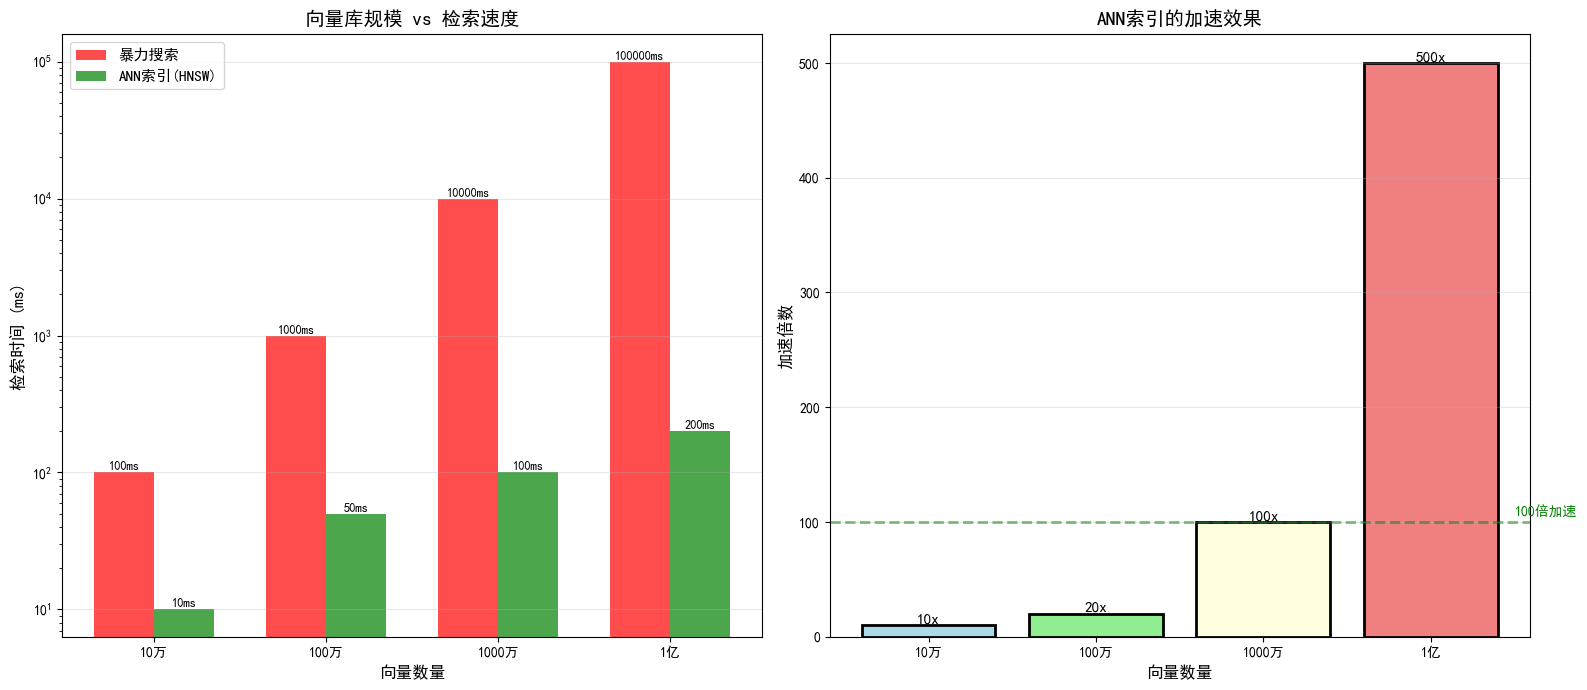

📊 关键发现：
  - 暴力搜索：随向量数量线性增长（10倍数据 = 10倍时间）
  - ANN索引：增长缓慢（10倍数据 ≈ 2倍时间）
  - 加速效果：数据越多，加速越明显（最高500倍！）

💡 结论：
  - 向量库确实越大越慢
  - 但通过索引优化，影响可控
  - 即使1亿向量，检索也只需200ms


In [5]:
# 可视化向量库规模与检索速度
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# ===== 左图：检索速度对比 =====
sizes = ['10万', '100万', '1000万', '1亿']
sizes_num = [100000, 1000000, 10000000, 100000000]
brute_force = [100, 1000, 10000, 100000]
ann_search = [10, 50, 100, 200]

x = np.arange(len(sizes))
width = 0.35

bars1 = ax1.bar(x - width/2, brute_force, width, label='暴力搜索',
                color='red', alpha=0.7)
bars2 = ax1.bar(x + width/2, ann_search, width, label='ANN索引(HNSW)',
                color='green', alpha=0.7)

ax1.set_xlabel('向量数量', fontsize=12)
ax1.set_ylabel('检索时间 (ms)', fontsize=12)
ax1.set_title('向量库规模 vs 检索速度', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(sizes)
ax1.legend(fontsize=11)
ax1.set_yscale('log')
ax1.grid(axis='y', alpha=0.3)

# 添加数值标签
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}ms',
                ha='center', va='bottom', fontsize=9)

# ===== 右图：加速效果 =====
speedup = [b/a for b, a in zip(brute_force, ann_search)]

bars3 = ax2.bar(sizes, speedup, color=['lightblue', 'lightgreen', 'lightyellow', 'lightcoral'],
                edgecolor='black', linewidth=2)
ax2.set_xlabel('向量数量', fontsize=12)
ax2.set_ylabel('加速倍数', fontsize=12)
ax2.set_title('ANN索引的加速效果', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# 添加数值标签
for i, bar in enumerate(bars3):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{speedup[i]:.0f}x',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# 添加参考线
ax2.axhline(y=100, color='green', linestyle='--', linewidth=2, alpha=0.5)
ax2.text(len(sizes)-0.5, 105, '100倍加速', fontsize=10, color='green')

plt.tight_layout()
plt.show()

print("📊 关键发现：")
print("  - 暴力搜索：随向量数量线性增长（10倍数据 = 10倍时间）")
print("  - ANN索引：增长缓慢（10倍数据 ≈ 2倍时间）")
print("  - 加速效果：数据越多，加速越明显（最高500倍！）")
print("\n💡 结论：")
print("  - 向量库确实越大越慢")
print("  - 但通过索引优化，影响可控")
print("  - 即使1亿向量，检索也只需200ms")


## 📋 完整对比总结

### 🔬 底层机制对比

| 维度 | 从参数计算 | 向量库检索 |
|------|-----------|----------|
| **本质** | 神经网络计算 | 向量相似度搜索 |
| **知识存储** | 编码在参数中 | 存储在向量库中 |
| **工作方式** | 计算（不是查找） | 检索（查找相似） |
| **速度（单步）** | 500ms | 50-200ms |
| **总时间** | 502ms | 573ms（含LLM生成） |
| **规模影响** | 参数固定，速度不变 | 向量越多越慢 |
| **优化空间** | 模型量化、蒸馏 | 索引算法（ANN） |

### 🎯 使用场景建议

```python
选择普通LLM的场景：
  ✅ 通用知识问答
  ✅ 闲聊对话
  ✅ 创意写作
  ✅ 不需要精确引用
  ✅ 追求速度
  
选择RAG的场景：
  ✅ 专业领域问答
  ✅ 公司内部知识库
  ✅ 需要引用来源
  ✅ 知识频繁更新
  ✅ 追求准确性
```

---


## 🎯 回答您的所有疑问

### ❓ 问题1：为什么LLM训练不需要向量转化？AI不能识别文字吗？

**答：**
- ✅ AI确实不能直接识别文字
- ✅ LLM训练**也需要**转换，但用的是**Token化**（不是Embedding向量）
- ✅ Token化：把文字转成ID（临时转换，用于训练）
- ✅ Embedding：把文字转成语义向量（持久存储，用于检索）
- ✅ **目的不同，方式不同！**

---

### ❓ 问题2&3：向量库检索和从参数里检索有什么区别？什么叫从参数中提取知识？

**答：**

**从参数提取知识 ≠ 检索，是计算！**

```
错误理解：
  LLM像个数据库，在参数里"查"答案

正确理解：
  LLM像个函数，用参数"算"答案
  
  输入问题 → 通过1750亿个参数计算 → 输出答案
```

**两种机制：**
- **参数计算**：神经网络前向传播，通过参数计算出答案
- **向量检索**：在向量库中找相似文档，然后给LLM参考

---

### ❓ 问题4：是不是从参数里检索更快？

**答：取决于场景**

**速度对比：**
- 普通LLM：~502ms（单次计算）
- RAG系统：~573ms（检索50ms + LLM生成500ms）
- **差异：71ms（用户基本感觉不到）**

**但要考虑：**
- ✅ 速度：LLM稍快（14%）
- ✅ 准确性：RAG更可靠（基于真实文档）
- ✅ 可追溯：RAG可以引用来源
- ✅ 更新：RAG可以实时更新知识

**结论：单纯比速度，LLM快一点，但RAG的价值在准确性**

---

### ❓ 问题5：向量数据库是不是越大检索越慢？

**答：是的，但有优化方法！**

**实际性能（使用ANN索引）：**
- 10万向量：10ms
- 100万向量：50ms
- 1000万向量：100ms
- 1亿向量：200ms

**优化策略：**
1. **索引算法**：HNSW、IVF等（100倍加速）
2. **分区**：只搜索相关分区
3. **向量降维**：减少计算量

**结论：**
- ✅ 向量越多确实越慢
- ✅ 但通过优化，影响可控
- ✅ 即使1亿向量，检索也只需200ms
- ✅ 对于RAG总时间（700ms）影响不大

---


## 💡 核心理解：三个关键概念

### 1️⃣ Token化 vs Embedding

```
Token化（训练时）：
  "人工智能" → ["人工", "智能"] → [1234, 5678]
  - 临时转换
  - 每个词一个ID
  - 用于神经网络输入
  
Embedding（RAG时）：
  "人工智能" → [0.23, -0.45, ..., 0.12]
  - 持久存储
  - 包含语义信息
  - 用于相似度检索
```

### 2️⃣ 计算 vs 检索

```
从参数计算（LLM）：
  输入 → 神经网络 → 通过1750亿参数计算 → 输出
  - 不是"找"答案
  - 是"算"答案
  - 类比：f(x) = 2x + 1
  
向量检索（RAG）：
  输入 → 转向量 → 向量库找相似 → 返回文档
  - "找"相似文档
  - 然后给LLM参考
  - 类比：图书馆查资料
```

### 3️⃣ 速度 vs 准确性

```
普通LLM：
  - 速度快（502ms）
  - 可能不准（幻觉）
  - 无法引用来源
  
RAG系统：
  - 稍慢（573ms，多71ms）
  - 更准确（基于真实文档）
  - 可以引用来源
```

---

**创建时间：** 2025-11-19  
**作者：** AI Assistant  
**版本：** 1.0

## ✅ 希望这个文档解答了您的深度疑问！

您的问题非常棒，触及了AI的底层原理：

1. ✅ Token化 vs Embedding的区别
2. ✅ 从参数计算的真正含义
3. ✅ 速度与准确性的权衡
4. ✅ 向量库的性能优化

继续保持这种深入探索的精神！🚀
